# 🛍️ Shopify E-Commerce Orders Analysis (2022–2023)

## 📈 Power BI Dashboard

While I used Python for EDA and SQL for querying, I also built a Power BI dashboard to help non-technical stakeholders easily view insights.

👉 [View Dashboard (PDF)] [link text](https://drive.google.com/file/d/177BIJyH08bP58L9DeEASny952Pa255EU/view?usp=sharing)


##Business Problem

The company wants to improve customer satisfaction by optimizing delivery times, identifying high-value customers, and reducing logistics inefficiencies.  
We use historical e-commerce order data (similar to Shopify) to uncover insights related to fulfillment delays, customer behavior, and shipping costs to recommend actionable improvements.





## Project Objectives
- Analyze and clean raw Shopify-style e-commerce data  
- Perform feature engineering to calculate useful metrics (e.g., delivery time, order value)  
- Use SQL and Pandas to answer critical business questions  
- Visualize key trends using Seaborn, Matplotlib, and Plotly  
- Extract insights to improve delivery performance, understand customer behavior, and reduce shipping cost inefficiencies

## Tools & Technologies
###Python libraries: Pandas, NumPy  
###Data cleaning & processing: Pandas  
###SQL Queries: pandasql  
###Visualization: Seaborn, Matplotlib, Plotly  
###Environment: Google Colab

## 🧭 Project Workflow

1. **Data Loading** – Load raw CSV files from multiple sources
2. **Data Cleaning** – Handle missing values, convert data types, remove duplicates
3. **Feature Engineering** – Create new columns (e.g., delivery_time, order_value)
4. **SQL & Pandas Queries** – Extract insights and answer business questions
5. **Data Visualization** – Plot findings with Seaborn, Matplotlib, and Plotly
6. **Insights & Recommendations** – Provide actionable takeaways for business improvement


#### ***Key Insights*** (Summary)

- Average delivery time is 11.5 days overall.
- 7.7% of orders are delivered late.
- Diapers & Hygiene category has the longest delays.
- State AP has the highest delivery time (26 days).
- Orders paid by Debit Card arrive slightly faster.

#### Conclusion & Recommendations

Based on the analysis:

- Investigate shipping delays in the Diapers & Hygiene category.
- Focus on improving logistics in states like AP.
- Reward and retain high-value customers identified in the data.
- Monitor payment types for potential optimizations.

These steps could improve customer satisfaction and reduce late deliveries.

###Importing Libraries

Step 1: Importing Libraries
For this project we will be using Pandas and NumPy, famous libraries of Python.
We will use pandas for handling DataFrames and numpy for basic operations.

We import necessary Python libraries to handle data manipulation, querying, and visualization.

In [ ]:
#importing necessary libraries
!pip install pandasql
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import plotly.express as px
import plotly.graph_objects as go

###Loading Dataset

Step 2: Loading Raw data from Kaggle
Link:- https://www.kaggle.com/datasets/bytadit/ecommerce-order-dataset?


Here we load all raw data files into Pandas DataFrames for inspection and cleaning.  
Each file represents one part of the Shopify-style order system.

We load the raw CSV files into Pandas DataFrames.  
Each file contains different parts of the Shopify e-commerce system.


In [ ]:
#loading datasets
customers= pd.read_csv("df_Customers.csv")
order_items= pd.read_csv("df_OrderItems.csv")
orders= pd.read_csv("df_Orders.csv")
payments= pd.read_csv("df_Payments.csv")
products= pd.read_csv("df_Products.csv")

###Initial Data Exploration

This step helps identify:
- Null values
- Data types
- Obvious duplicates
- Inconsistent formats

We will inspect each dataset before cleaning.

In [ ]:
# customers dataset analysis
customers.head()                                #customers dataframe 5 rows
customers.info()                                #customers dataframe basic information
customers.describe()                            #customers dataframe statistical analysis
customers.isnull().sum()                        #customers null values
customers.duplicated().sum()                    #customers dataframe duplicated values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int64 
 2   customer_city             89316 non-null  object
 3   customer_state            89316 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


np.int64(0)

####**customers table summary**

Rows:89,316 | Columns:4  
- No missing values in any column  
- No outliers as well
- Data types are appropriate:
  - customer_id: object
  - customer_zip_code_prefix: int64
  - customer_city: object
  - customer_state: object

Next Steps:
 No transformations required.


In [ ]:
#orders dataset analysis
orders.head()                                #to display first 5 rows of head
orders.info()                                #to display basic information
orders.describe()                            #to display the statistical analysis of orders dataframe
orders.isnull().sum()                        #to display the null values in the dataset
orders.duplicated().sum()                    #to check the duplicates in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


np.int64(0)

####orders table summary – Delivery Timeline Issues

Rows: 89,316 | Columns: 7  
- Most columns are clean, but a few issues were found:
  - order_approved_at: 9 missing values (possibly cancelled or unapproved orders)
  - order_delivered_timestamp: 1,889 missing (likely unfulfilled or returned orders)
- All timestamp columns are stored as object:
  - order_purchase_timestamp
  - order_approved_at
  - order_delivered_timestamp
  - order_estimated_delivery_date
- No outliers

📌 These should be converted to datetime for proper date-based operations.

🛠️ Next Steps:
-Change all date columns from object to datetime format

Check why some orders do not have order_approved_at or order_delivered_timestamp — they might be cancelled or never shipped

Decide what to do with those missing dates:

- We can leave them if they make sense (e.g., cancelled orders)

- Or fill the missing data with mean()| mode()| ffill| bfill.
- Or drop the missing data by using dropna.




In [ ]:
#order_items dataset analysis
order_items.head()                                           #to display first 5 rows of dataset
order_items.info()                                           #to display basic information
order_items.describe()                                       #to display the statistical analysis of orders_items dataframe
order_items.isnull().sum()                                   #to display the null values in the dataset
order_items.duplicated().sum()                               #to check the duplicates in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          89316 non-null  object 
 1   product_id        89316 non-null  object 
 2   seller_id         89316 non-null  object 
 3   price             89316 non-null  float64
 4   shipping_charges  89316 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.4+ MB


np.int64(0)

####order_items orders Table – Product & Pricing Details


- Rows: 89,316 | Columns: 5  
- No missing values in any column  
- All data types are correct:
  - order_id, product_id, seller_id: object (categorical identifiers)
  - price, shipping_charges: float64 (numeric and correctly typed)
- No duplicates or formatting issues found
-(No Outliers) The wide price and shipping charge ranges reflect valid differences across diverse product categories, so extreme values are not necessarily outliers.
🛠️Next Steps:
- No cleaning needed for this file



In [ ]:
#payments dataset analysis
payments.head()                                          #to display first 5 rows of dataset
payments.info()                                          #to display basic information
payments.describe()                                      #to display the statistical analysis of payments dataframe
payments.isnull().sum()                                  #to display the null values in the dataset
payments.duplicated().sum()                              #to check the duplicates in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              89316 non-null  object 
 1   payment_sequential    89316 non-null  int64  
 2   payment_type          89316 non-null  object 
 3   payment_installments  89316 non-null  int64  
 4   payment_value         89316 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ MB


np.int64(0)

####**payments table – Installments & Value Breakdown**

- Rows: 89,316 | Columns: 5  
- No missing values found  
- All data types are appropriate:
  - order_id: object (categorical ID)
  - payment_sequential: int64 (sequence of payments within same order)
  -payment_type: object (categorical)
  - payment_installments: int64 (number of payments — should be whole numbers)
  - payment_value: float64 (currency, which includes decimals)
- Duplicate check: 0 duplicated rows found
- (No Outlier) Payment installments and payment values vary widely, reflecting diverse customer payment preferences and corresponding order prices.


🛠️ Next Steps:
- No cleaning or transformation required  



In [ ]:
#products
products.head()                           #to display first 5 rows of dataset
products.info()                           #to display basic information
products.describe()                       #to display the statistical analysis of products dataframe
products.isnull().sum()                   #to display the null values in the dataset
products.duplicated().sum()               #to check the duplicates in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             89316 non-null  object 
 1   product_category_name  89008 non-null  object 
 2   product_weight_g       89301 non-null  float64
 3   product_length_cm      89301 non-null  float64
 4   product_height_cm      89301 non-null  float64
 5   product_width_cm       89301 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


np.int64(61865)

####**products table summary**

- Rows: 89,316 | Columns: 6  
- Missing values found:
  - product_category_name: 308 missing (small amount, may need imputation or removal depending on analysis)
  - product_weight_g, product_length_cm, product_height_cm, product_width_cm: 15 missing each (very small fraction)
- Data types look appropriate:
  - product_id, product_category_name: object (categorical)
  - Dimensions and weight: float64 (numeric)
- Duplicate rows: present and expected — multiple entries of same product can occur due to orders
- Product dimensions and weights show natural variation due to diverse product categories, with no significant outliers detected.

🛠️ Next Steps:
- Handle missing values:
  - imputing missing dimensions/weight with median or mean values per category
  - missing categories — if too many, decide whether to drop or fill them

- We will not remove duplicates as they are natural in product datasets


### Clean orders Table

Tasks:

- Convert date columns from object to datetime for accurate date operations.
- Impute or handle missing timestamps logically.
- Impute missing product info using mode or mark as 'Unknown' for categories.

In [ ]:
#Converting date columns to date time.
#order_purchase_timestamp, order_approved_at, order_delivered_timestamp, order_estimated_delivery_date into datetime format.
orders["order_purchase_timestamp"]= pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_approved_at"]= pd.to_datetime(orders["order_approved_at"])
orders["order_delivered_timestamp"]= pd.to_datetime(orders["order_delivered_timestamp"])
orders["order_estimated_delivery_date"]= pd.to_datetime(orders["order_estimated_delivery_date"])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89316 non-null  object        
 1   customer_id                    89316 non-null  object        
 2   order_status                   89316 non-null  object        
 3   order_purchase_timestamp       89316 non-null  datetime64[ns]
 4   order_approved_at              89307 non-null  datetime64[ns]
 5   order_delivered_timestamp      87427 non-null  datetime64[ns]
 6   order_estimated_delivery_date  89316 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 4.8+ MB


In [ ]:
# We are dropping the NaN values in both order_approved_at and order_delivered_timestamp for calculating mean.
order_approved_dates= orders["order_approved_at"].dropna(axis=0)
order_delivered_time= orders["order_delivered_timestamp"].dropna(axis=0)
Total_time_taken= ((order_delivered_time)-(order_approved_dates)).mean()
print(Total_time_taken)

12 days 00:03:11.207154133


In [ ]:
# Filling the missing values of order_delivered_time and order_approved_dates with substracting and adding mean into the order_approved_dates and order_delivered_time respectively.
orders['order_approved_at']= orders["order_approved_at"].fillna(orders["order_delivered_timestamp"]- Total_time_taken)
orders["order_delivered_timestamp"]= orders["order_delivered_timestamp"].fillna(orders["order_approved_at"] + Total_time_taken)
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_timestamp,0
order_estimated_delivery_date,0


In [ ]:
#orders table after cleaning
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89316 non-null  object        
 1   customer_id                    89316 non-null  object        
 2   order_status                   89316 non-null  object        
 3   order_purchase_timestamp       89316 non-null  datetime64[ns]
 4   order_approved_at              89316 non-null  datetime64[ns]
 5   order_delivered_timestamp      89316 non-null  datetime64[ns]
 6   order_estimated_delivery_date  89316 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 4.8+ MB


#### Handling Missing Timestamp Columns
During our data inspection, we found missing values in two key datetime columns:

- `order_approved_at` → 9 missing
- `order_delivered_timestamp` → 1,889 missing

Rather than dropping these rows (which could mean losing valuable order data), or using methods like forward-fill (`ffill`), backward-fill (`bfill`), or mode (which could lead to unrealistic or duplicate dates), we chose a more meaningful imputation strategy.

####  Our Approach:
1. Calculate average delivery time  
   We computed the average time difference between `order_approved_at` and `order_delivered_timestamp` using only complete rows.

2. Fill `order_approved_at`  
   For missing values in this column, we subtracted the average delivery time from the corresponding `order_delivered_timestamp`.

3. Then fill `order_delivered_timestamp`  
   Using the newly filled `order_approved_at`, we added the average delivery time to estimate the missing delivery timestamps.

####  Why this approach?
- Maintains logical consistency across the order lifecycle
- Avoids data loss
- Produces realistic estimations based on overall behavior

####  Outcome:
All datetime columns now have `0` missing values. The dataset is ready for further transformation and analysis.




### Clean products Table
Tasks:
    Handle missing values of `product_category_name`, `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`.

In [ ]:
#filling the missing values with the mode in each column.
products["product_weight_g"]= products["product_weight_g"].fillna(products["product_weight_g"].mode()[0])
products["product_length_cm"]= products["product_length_cm"].fillna(products["product_length_cm"].mode()[0])
products["product_height_cm"]= products["product_height_cm"].fillna(products["product_height_cm"]. mode()[0])
products["product_width_cm"]= products["product_width_cm"].fillna(products["product_width_cm"]. mode()[0])
products["product_category_name"]= products["product_category_name"].fillna(products["product_category_name"]. mode()[0])

In [ ]:
products.isnull().sum()

,0
product_id,0
product_category_name,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [ ]:
#products table after cleaning
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             89316 non-null  object 
 1   product_category_name  89316 non-null  object 
 2   product_weight_g       89316 non-null  float64
 3   product_length_cm      89316 non-null  float64
 4   product_height_cm      89316 non-null  float64
 5   product_width_cm       89316 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


#### Handling Missing Values in `products` Table

Upon inspecting the `products` dataset, we identified the following missing values:

- `product_category_name`: 308 missing
- `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`: 15 missing each

These are very minimal compared to the total size (less than 0.5% of the dataset), but handling them correctly is important to maintain data quality.


#### Imputation Strategy

- For numerical columns (dimensions and weight), we filled missing values using the **mode** (i.e., the most frequently occurring value).
  
  > 📌 **Why Mode and Not Mean?**  
  Using the **mean** might introduce unrealistic product sizes (like 13.67 cm) that do not actually exist.  
  The **mode**, on the other hand, reflects the most common and realistic values already in use for products, which maintains data consistency.

- For **`product_category_name`**, we filled missing values with `'Unknown'`.  
  This allows us to preserve those rows and still analyze them later if needed.


####  Why We Did **Not** Drop Rows

While dropping rows is one way to handle missing data, it was not ideal here:

- Deleting rows would mean **losing valid `product_id`s** that are linked to the `orders`, `order_items`, and `payments` tables.
- This would create **inconsistencies across tables** and reduce the size and integrity of our merged dataset.
- It is important to retain as much data as possible for downstream analysis and modeling.


✅ **Conclusion**:  
We chose **mode-based imputation** for numerical fields and assigned `'mode'` for missing categories to preserve data integrity, avoid unnecessary row loss, and ensure realistic values are maintained throughout the dataset.




### ✅ Final Check After Data Cleaning
We verify that all missing values are handled and data types are corrected in the key tables before moving to merging.

### **Merging Datasets**

 Merge Datasets

We combine all datasets into a single DataFrame to facilitate analysis.  
Merging ensures all relevant data points are connected per order.

In [ ]:
# Merge orders + order_items
orders_merged= pd.merge(orders, order_items, on="order_id", how="left")
# Merge with customers
customers_merged= pd.merge(orders_merged, customers, on="customer_id", how="left")
# Merge with products
product_merged= pd.merge(customers_merged, products, on="product_id", how="left")
# Merge with payments
payments_merged= pd.merge(product_merged, payments, on= "order_id", how="left")
print(payments_merged.shape)

(2529486, 23)


In [ ]:
#Checking duplicates again
duplicates_all = payments_merged.duplicated().sum()
print(duplicates_all)
payments_merged= payments_merged.drop_duplicates()
#we have removed the duplicated values that occur while merging.

2440170


In [ ]:
# checking the size of the dataset
payments_merged.shape

(89316, 23)

In [ ]:
# saving the cleaned dataset
payments_merged.to_csv("Payments_Merged")

The purpose of merging was to bring all relevant order-related data into one single view. Individually, the datasets only provide partial insights:

orders → tells us when a customer purchased

customers → tells us who the customer is and where they're from

order_items → tells us what product was bought and its price

products → gives product details like size, category, and dimensions

payments → gives how the customer paid and how much

By combining them, we can now answer important business questions.

Now, we have merged all the tables along with removing duplicates.

In [ ]:
payments_merged.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'average_delivery_time', 'order_delivered_late',
       'order_satisfaction', 'order_cancellations'],
      dtype='object')

In [ ]:
#getting a statistical overview of the dataset after merging
payments_merged.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,price,shipping_charges,customer_zip_code_prefix,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value
count,89316,89316,89316,89316,89316.000000,89316.000000,89316.000000,89316.000000,89316.00000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000
mean,2017-12-28 18:48:18.752742912,2017-12-29 05:14:27.255162624,2018-01-10 05:17:38.462317312,2018-01-21 16:16:51.850060544,340.900543,44.283210,40499.471080,2086.751209,30.21827,16.558321,23.033701,1.099646,2.965717,268.657190
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-11 13:46:32,2016-10-20 00:00:00,0.850000,0.000000,1003.000000,0.000000,7.00000,2.000000,6.000000,1.000000,0.000000,0.000000
25%,2017-09-08 16:33:39,2017-09-09 06:35:14.750000128,2017-09-19 18:25:10,2017-09-29 00:00:00,59.650000,20.110000,9785.000000,300.000000,18.00000,8.000000,15.000000,1.000000,1.000000,84.340000
50%,2018-01-16 16:13:36,2018-01-16 21:32:16,2018-01-30 14:06:14,2018-02-14 00:00:00,136.900000,35.055000,35480.000000,700.000000,25.00000,13.000000,20.000000,1.000000,2.000000,171.860000
75%,2018-05-02 12:20:40,2018-05-02 20:53:46.249999872,2018-05-12 14:21:23.155365632,2018-05-24 00:00:00,399.200000,57.190000,70040.000000,1800.000000,38.00000,20.000000,30.000000,1.000000,4.000000,313.530000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-10-17 13:22:46,2018-10-25 00:00:00,6735.000000,409.680000,99990.000000,40425.000000,105.00000,105.000000,118.000000,29.000000,24.000000,7274.880000
std,NaN,NaN,NaN,NaN,557.459897,37.672491,31194.386361,3746.804350,16.10990,13.387659,11.687364,0.772658,2.796406,344.409566


### Questions To **Answer**
This step also include Feature Engineering
We create new useful columns as required for analysis such as average_delivery_time, order_delivered_late,
       order_satisfaction, order_cancellations.
###Delivery Time Optimization
- What is the average delivery time (order_approved_at → order_delivered_timestamp) overall and by region?
- Which product categories or sellers experience the longest delivery delays?
- How does delivery time vary by order status or payment method?
- What percentage of orders are delivered late compared to estimated delivery date?
- Are there specific time periods (months/seasons) with higher delivery delays?
# Customer Analysis

- Who are the top customers by total spend and order frequency?
- What are the common characteristics of high-value customers? (location and product data)
- How does customer loyalty correlate with delivery time and order satisfaction?
- Are there customers with frequent returns or cancellations?
-  What are the average and total shipping charges by region, category, and seller?
- Are there orders with zero or unusually low shipping costs?


####What is the average delivery time (order_approved_at → order_delivered_timestamp) overall and by region?

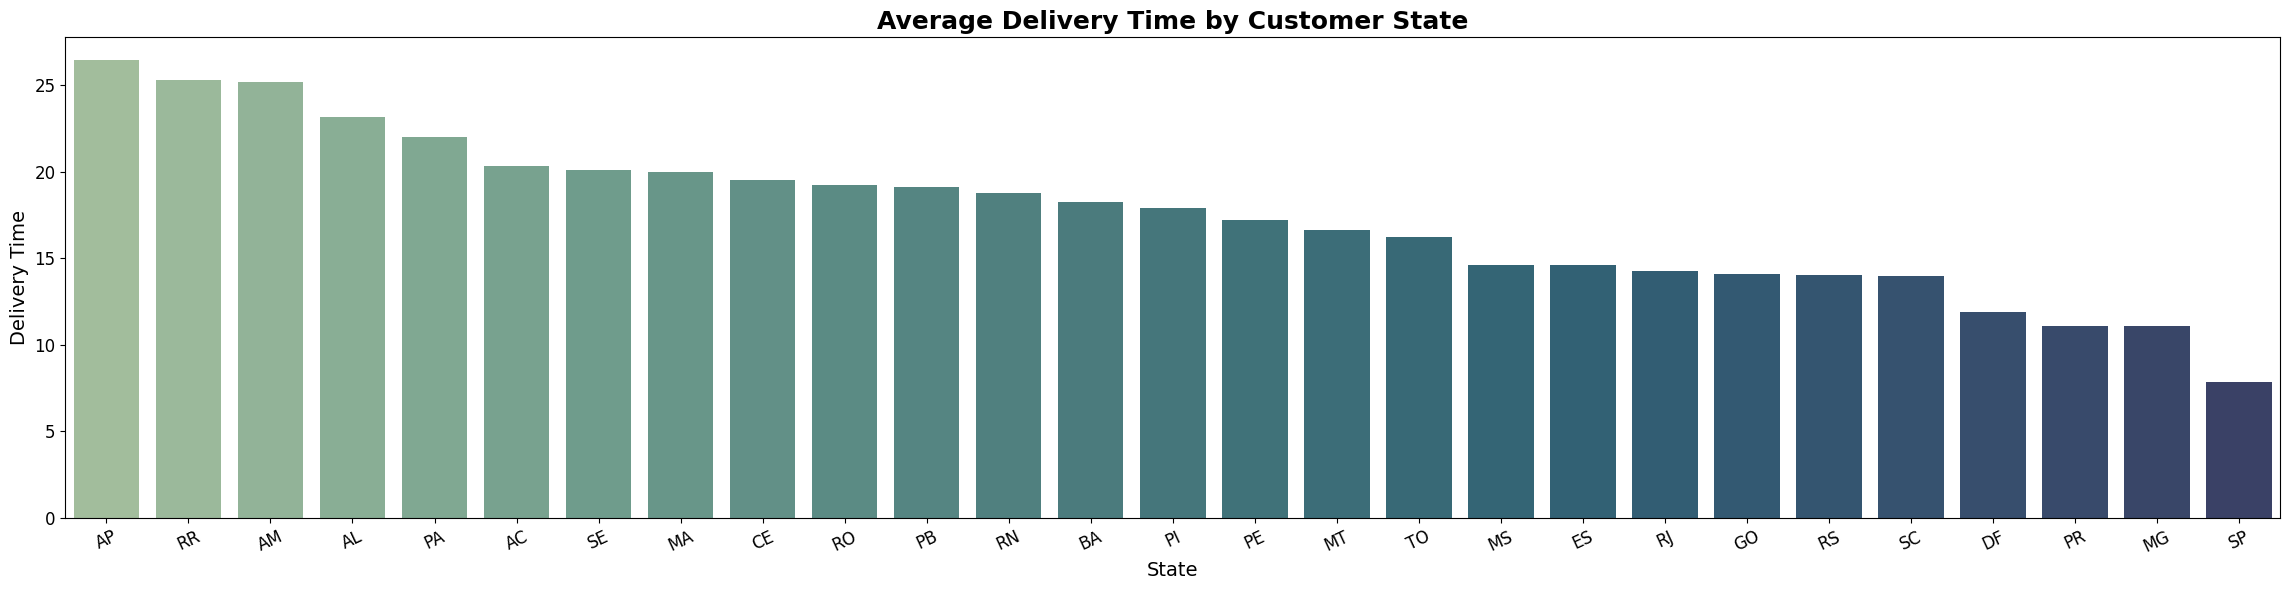

In [ ]:
# what is the average delivery time(order_approved_at, order_delivered_timestamp) overall and by region?
#creating a new column in the table, to calculate average delivery time in days between approval and delivery
payments_merged["average_delivery_time"]= (payments_merged["order_delivered_timestamp"]-payments_merged["order_approved_at"]).dt.days
#SQL query to calculate average delivery time by customer state
query="SELECT customer_state, AVG(average_delivery_time) AS delivery_time FROM payments_merged GROUP BY customer_state ORDER BY delivery_time DESC;"
result= pysqldf(query)
#plotting the graph
#setting the graph size
plt.figure(figsize=(23,6))
#plotting the bar graph using seaborn
sns.barplot(x="customer_state", y="delivery_time", data=result, hue="customer_state",palette='crest', saturation=0.6)
#labelling the title, x-axis and y-axis
plt.title("Average Delivery Time by Customer State", fontsize=18, fontweight="bold")
plt.xlabel("State", fontsize=14)
plt.ylabel("Delivery Time", fontsize=14)
#Rotate x-axis labels for better readability and set font sizes
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12)
#setting the layout tight
plt.tight_layout()
#Display the plot
plt.show()

#####Insights- Average Delivery Time by Customer State
- Average delivery time overall: 11.52 days

- Longest delays: AP (26.45 days), Roraima, and Amazonas — likely due to fewer warehouses or longer shipping routes.

- Fastest deliveries: SP (~8 days), MG, PR, DF — possibly due to centralized fulfillment centers and better infrastructure.

**Interpretation**
- Geographic distance from warehouses or poor logistics infrastructure likely causes slower delivery in northern/remote states.

**Recommendations**
- Set up regional distribution centers in high-delay areas (e.g. AP, RR).

- Optimize last-mile delivery in remote states.

- Investigate regional carrier performance for further improvements.

####Which product categories or sellers experience the longest delivery delays?

/tmp/ipython-input-26-1407871858.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_category_name", y="Delivery_delays", data=result, palette="flare", alpha=0.7)


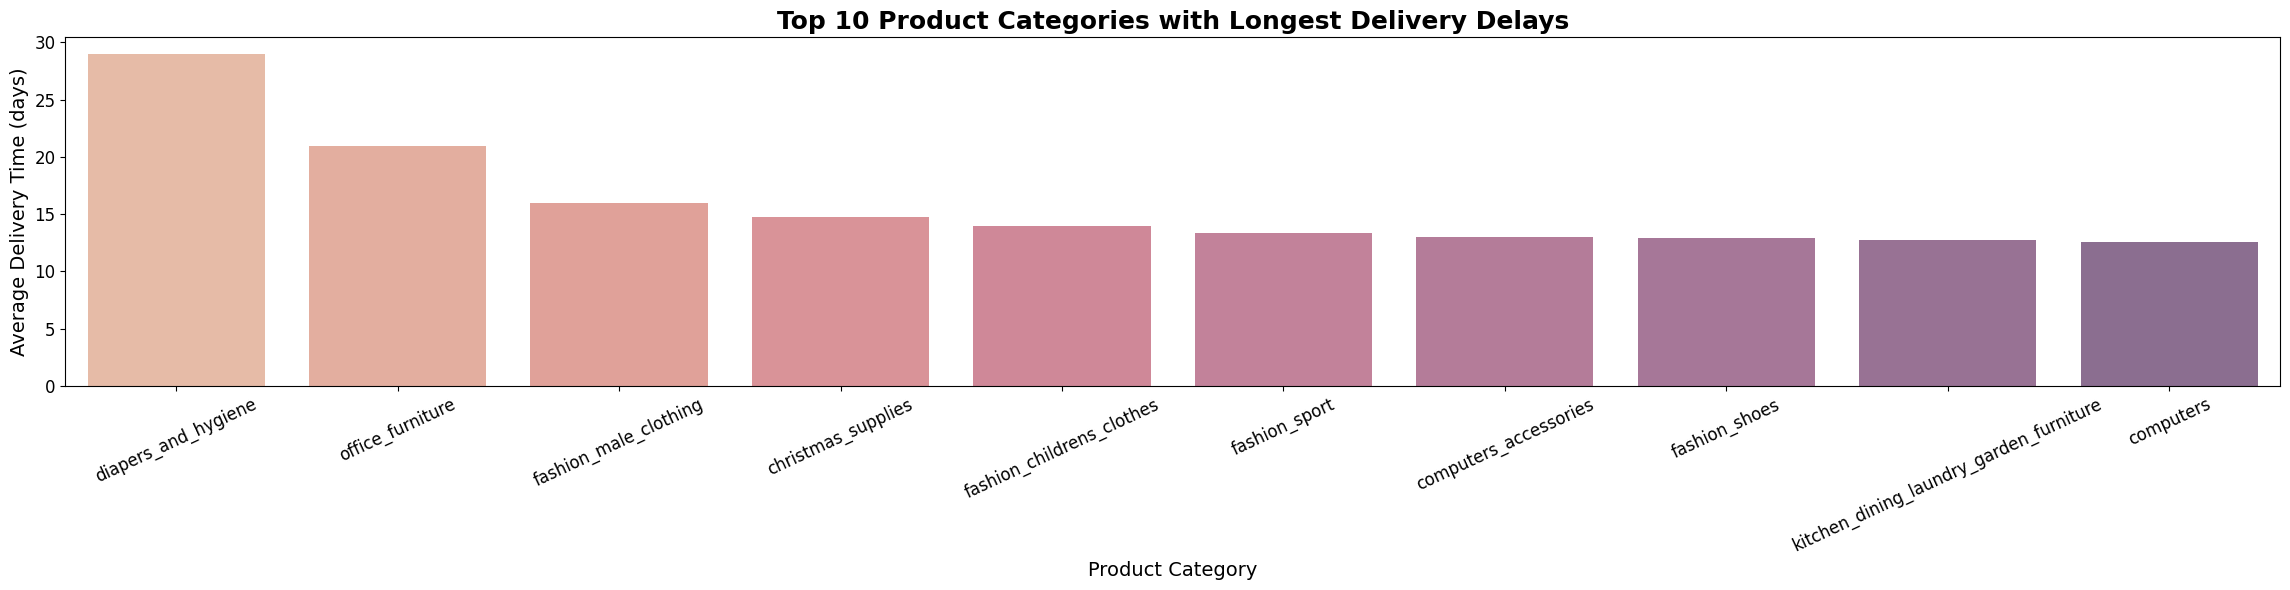

In [ ]:
# Which product categories have the longest delivery delays?
#SQL query to calculate the longest delivery delays by product categories
query= "SELECT product_category_name, AVG(average_delivery_time) AS Delivery_delays FROM payments_merged GROUP BY product_category_name ORDER BY Delivery_delays DESC LIMIT 10"
result= pysqldf(query)
#plotting the graph
#setting the graph size
plt.figure(figsize=(23,6))
#plotting the bar graph using seaborn
sns.barplot(x="product_category_name", y="Delivery_delays", data=result, palette="flare", alpha=0.7)
#labelling the title, x-axis and y-axis
plt.title("Top 10 Product Categories with Longest Delivery Delays", fontsize=18, fontweight="bold")
plt.ylabel("Average Delivery Time (days)", fontsize=14)
plt.xlabel("Product Category", fontsize=14)
#Rotate x-axis labels for better readability and set font sizes
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12)
#setting the layout tight
plt.tight_layout()
#setting the white grid
sns.set_style("whitegrid")
#Displaying the graph
plt.show()

#####Insights- Top 10 Product Categories with Longest Delivery Delays

The top delayed category is Diapers and Hygiene, with an average delivery time of 29 days, followed by Office Furniture (21 days). These insights are surprising, especially since hygiene products are light and essential. The business should investigate vendor performance and fulfillment pipelines for these categories.

- Office furniture and male clothing also show high delays (21 and 16 days).

- Other delayed categories include Christmas supplies, children’s clothes, and tech accessories (13–15 days).

**Interpretation**:

- Essential products facing delays may harm customer trust.

- Bulky or seasonal items (e.g., furniture, holiday goods) likely delayed due to shipping and inventory challenges.

- Fashion and tech delays suggest issues with sourcing, sizing, or high return rates.

Recommendations:

- Improve supply chain for essential goods like diapers.

- Use regional warehousing for large items like furniture.

- Plan inventory in advance for seasonal categories.


####How does delivery time vary by order status or payment method?

/tmp/ipython-input-27-634817169.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_type", y="average_delivery_time", data= payments_merged, palette="flare")


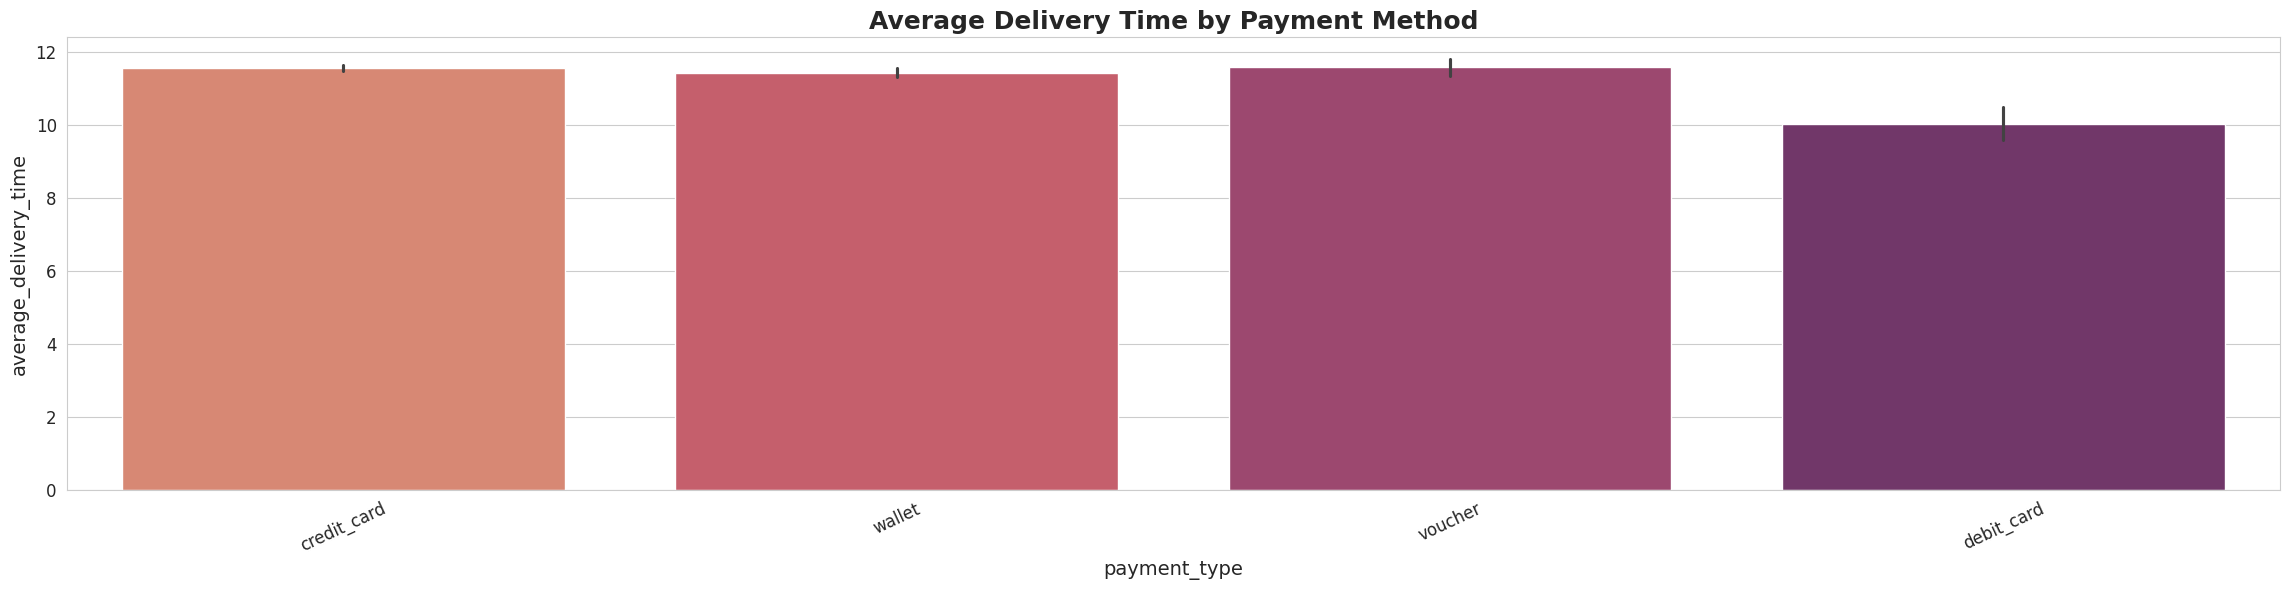

In [ ]:
#How does delivery time vary by order status or payment method?
#SQL query to calculate the delivery time by order status and payment method
query= "SELECT AVG(average_delivery_time), payment_type FROM payments_merged GROUP BY payment_type ORDER BY average_delivery_time DESC;"
result= pysqldf(query)
#plotting the graph
#setting the graph size
plt.figure(figsize=(23,6))
#plotting the bar graph using seaborn
sns.barplot(x="payment_type", y="average_delivery_time", data= payments_merged, palette="flare")
#labelling the title, x-axis and y-axis
plt.title("Average Delivery Time by Payment Method", fontsize=18, fontweight="bold")
plt.xlabel("payment_type",fontsize=14)
plt.ylabel("average_delivery_time",fontsize=14)
#Rotate x-axis labels for better readability and set font sizes
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12)
#setting the layout tight
plt.tight_layout()
#Displaying the layout
plt.show()

**The** bar chart shows delivery time for each payment method.

#####Key Insights
Debit card orders are delivered fastest (10 days).

Voucher payments face the longest delays (11.7 days).

Credit card and wallet fall in between (11.5 days).

The difference is small but can affect customer experience.

 **Interpretation**:

Faster debit card deliveries may result from real-time confirmation.
Voucher delays could stem from manual checks or third-party processing.

 **Recommendation:**

Look into causes of voucher-related delays.

Encourage debit card use via small incentives or discounts.



####What percentage of orders are delivered late compared to estimated delivery date?

In [ ]:
#What percentage of orders are delivered late compared to estimated delivery date?
#creating a new column in the table to calculate the late delivery of orders
payments_merged["order_delivered_late"]= payments_merged["order_delivered_timestamp"] > payments_merged["order_estimated_delivery_date"]
Total_orders_late= payments_merged["order_delivered_late"].value_counts().reindex([False, True])
Label1=["On-time", "Late"]
#Now showing the graph
#setting the pie size
plt.figure(figsize=(2,2))
#plotting the pie chart
import plotly.graph_objects as go
fig= go.Figure(go.Pie(labels=Label1, values= Total_orders_late, marker_colors=["#1f77b4", "#ff7f0e"], pull=[0,0.3], hole=0.3))
#setting the title of the graph
fig.update_layout(title="Percentage of Late vs On-Time Deliveries")
#showing the pie graph
fig.show()

<Figure size 200x200 with 0 Axes>

#####**Insights**
92.28% of deliveries were on-time.

Only 7.72% of deliveries were late, showing a high overall efficiency.

 **Interpretation**
The company is doing well overall in managing deliveries, but there is still room for reducing the late delivery percentage, especially in states with higher delays.

**Recommendations**
Focus late-delivery reduction efforts on the top 5 slowest states.




####Are there specific time periods (months/seasons) with higher delivery delays?

/tmp/ipython-input-29-3019235793.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




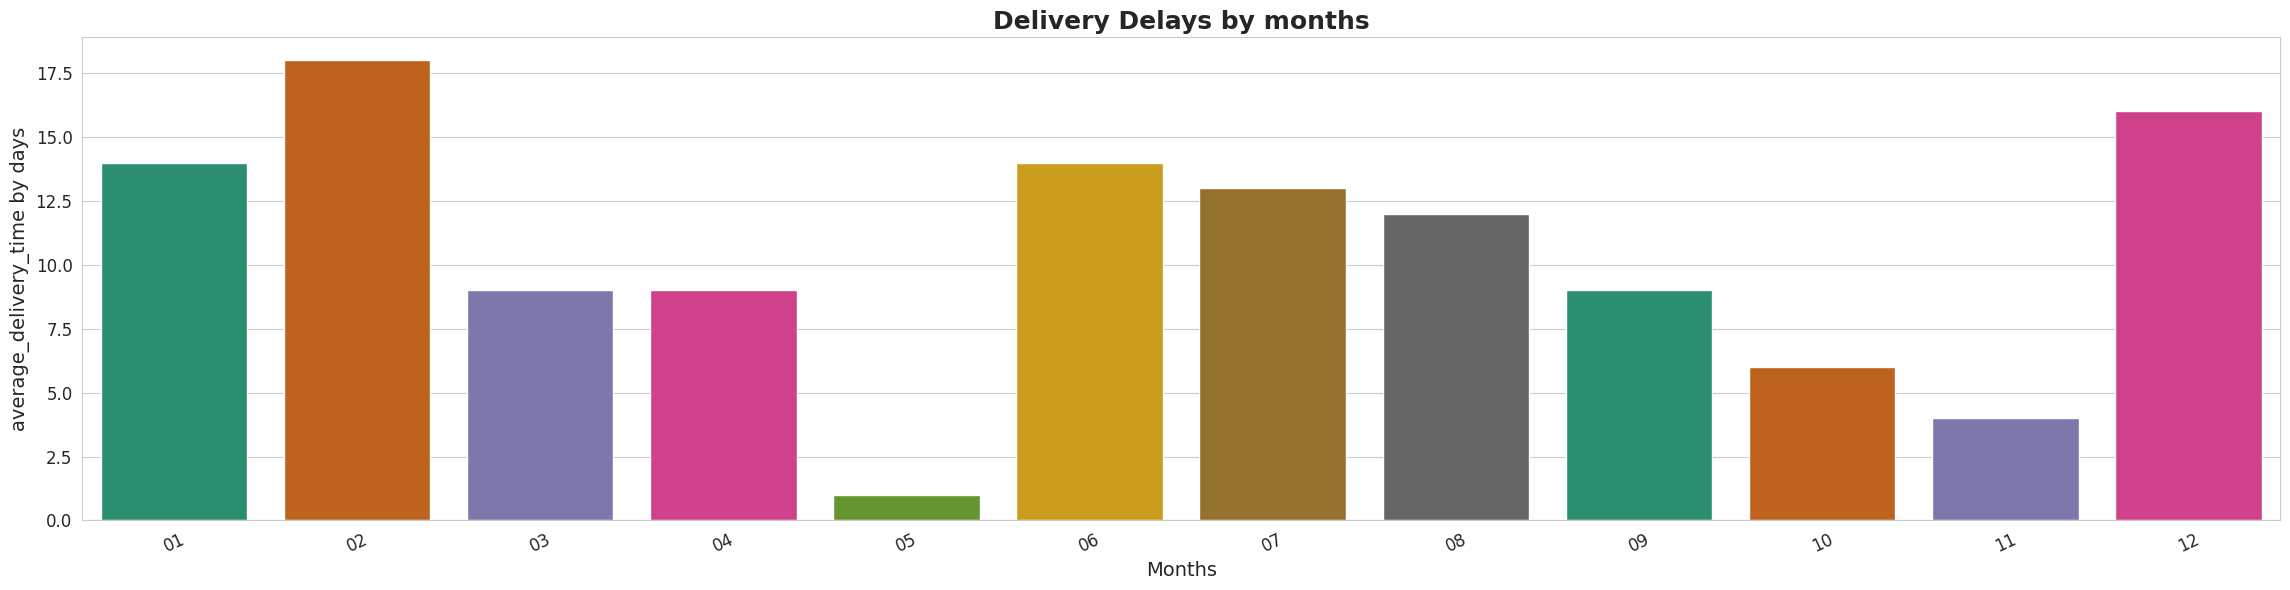

In [ ]:
#Are there specific time periods (months/seasons) with higher delivery delays?
#SQL query to calculate the delivery delays by months
query="SELECT strftime('%m', order_estimated_delivery_date) AS Months, average_delivery_time FROM payments_merged GROUP BY Months ORDER BY Months;"
result= pysqldf(query)
#setting the size of the figure
plt.figure(figsize=(23,6))
#setting up the barplot
sns.barplot(x="Months", y="average_delivery_time",data= result, palette="Dark2")
#adding the title, xlabel and ylabel
plt.title("Delivery Delays by months", fontsize=18, fontweight="bold")
plt.xlabel("Months", fontsize=14)
plt.ylabel("average_delivery_time by days", fontsize=14)
#Rotate x-axis labels for better readability and set font sizes
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12)
#setting the layout
plt.tight_layout()
#displaying the graph
plt.show()

Delivery Delays by Months
#####**Insights:**

Worst delivery delays occurred in February (18+ days) and December (16+ days).

Delivery performance is best in May (1 day) and November (4 days).

Delays also spike mid-year (June, July) and taper slightly afterward.

Interpretation:

Peak delivery delays align with seasonal shopping spikes: holidays, sales events (e.g., Black Friday, Christmas, post-New Year).

The logistic system might be under-capacity during peak demand.

Recommendations:

- Analyzing warehousing capacity ahead of known peak months (especially February & December).

- Use data forecasting to better allocate inventory and delivery resources.


Deliveries are slower in December and February, probably because of holiday shopping and winter weather, but May is the fastest month. Knowing this can help plan better.

####Delivery Time Optimization- KPIs
- Average Delivery Time: On average, orders are delivered in 11 days, with some states experiencing delays up to 26 days (e.g., state AP).

- Late Deliveries: Approximately 7.72% of orders are delivered later than the estimated date, indicating potential areas for logistics improvement.

- Top Delay Categories: The product category with the longest delivery delays is diapers_and_hygiene, suggesting a need to review handling or shipping processes for these items.

- Delivery Time by Payment Method: Orders paid by Debit Card tend to have slightly faster deliveries compared to other payment methods.

- Seasonal Patterns: Delivery delays peak in December and February, possibly due to high demand and weather impacts, while May shows the shortest delivery times.

- Customer Impact: States with the longest delivery times may face customer satisfaction challenges, highlighting opportunities for targeted operational improvements.



**Recommendation**
- Focus on fixing delivery problems in states with the longest delays (like AP). Maybe open local warehouses there.

- Check why diapers and similar products are delayed and fix those issues fast.

- Plan better for busy months so delivery teams don’t get overwhelmed.

- Make voucher payments faster or encourage people to pay by debit card with small discounts.

- Improve overall delivery during busy seasons by preparing early.




####Who are the top customers by total spend and order frequency?

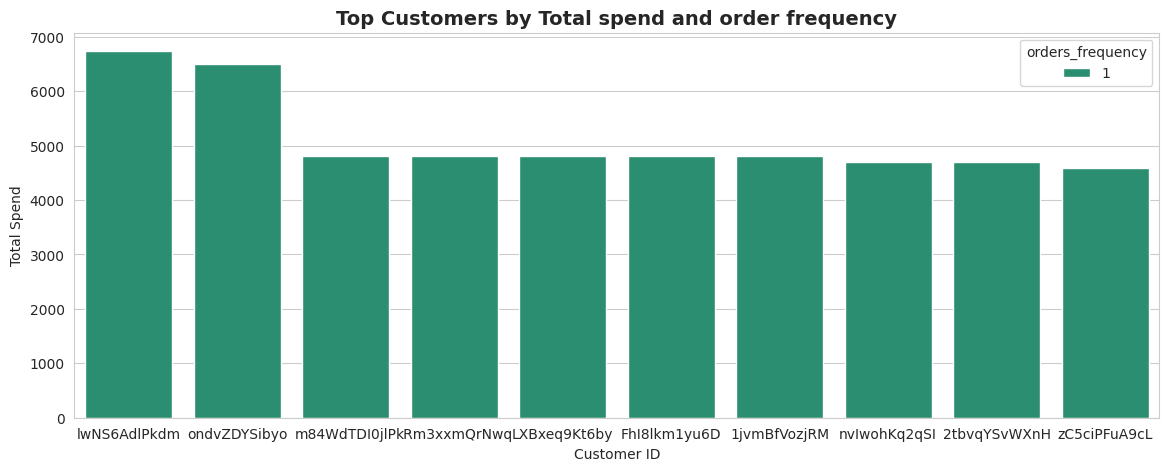

In [ ]:
# Who are the top customers by total spend and order frequency?
query= "SELECT customer_id, COUNT(order_id) AS orders_frequency, SUM(price) AS Total_spend FROM payments_merged GROUP BY customer_id ORDER BY Total_spend DESC LIMIT 10;"
result= pysqldf(query)
plt.figure(figsize=(14,5))
sns.barplot(data=result, x="customer_id", y="Total_spend", hue="orders_frequency", palette="Dark2")
plt.xlabel("Customer ID", fontsize=10)
plt.ylabel("Total Spend", fontsize=10)
plt.title("Top Customers by Total spend and order frequency", fontsize=14, fontweight="bold")
plt.show()

Top Customers by Total Spend and Order Frequency
#####**Insights:**

All top customers made only one order, regardless of their high total spend.

Customers lwNS6AdlPkdm and ondvZDYSibyo spent the most (6,500+), but only purchased once.

**Interpretation:**

High-value customers are not repeat buyers – this suggests a missed opportunity for customer retention.


**Recommendations:**

Implement post-purchase campaigns to upsell or cross-sell relevant products.

Add incentives for repeat purchases (e.g., discounts for 2nd or 3rd orders).


####What are the common characteristics of high-value customers? (location and product data)

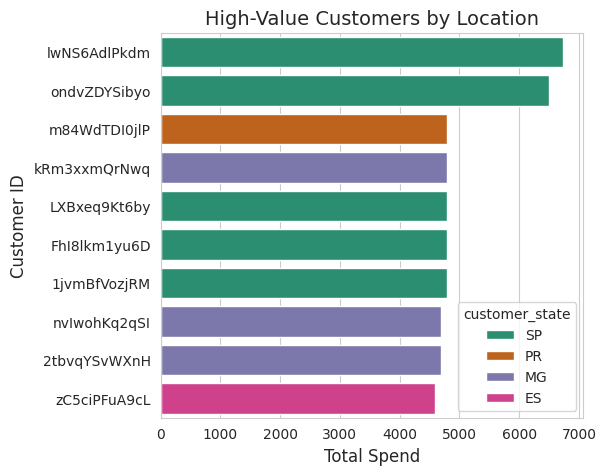

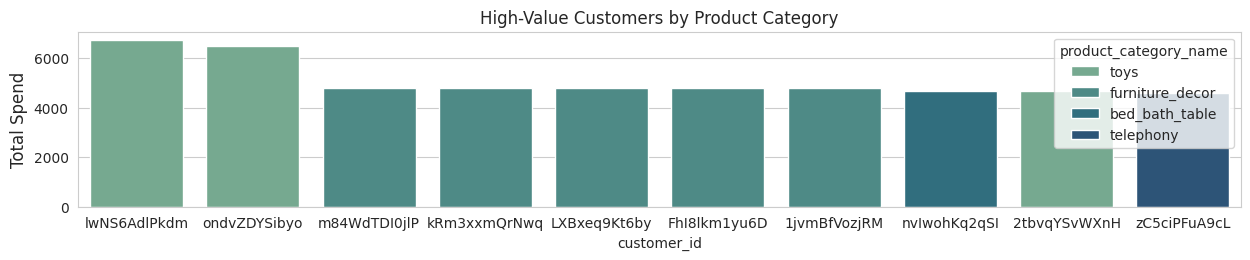

In [ ]:
#What are the common characteristics of high-value customers? (location and product data)
query= "SELECT customer_id, customer_state, product_category_name, SUM(price) AS Total_spend FROM payments_merged GROUP BY customer_id ORDER BY Total_spend DESC LIMIT 10;"
result= pysqldf(query)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data=result, y="customer_id", x="Total_spend", hue="customer_state", palette="Dark2")
plt.title("High-Value Customers by Location", fontsize=14)
plt.ylabel("Customer ID", fontsize=12)
plt.xlabel("Total Spend", fontsize=12)
plt.show()

plt.figure(figsize=(33,5))
plt.subplot(2,2,2)
sns.barplot(data=result, x="customer_id", y="Total_spend", hue="product_category_name", palette="crest")
plt.title('High-Value Customers by Product Category')
plt.ylabel("Total Spend", fontsize=12)
plt.xlabel("customer_id")
plt.show()


# **High-Value Customers by Location**

#####**Insights:**

The top two customers (lwNS6AdlPkdm and ondvZDYSibyo) spend significantly more (6,500–7,000) than others.

Most top customers are from SP (São Paulo) state.

A few are from other states: PR, MG, and ES.

 **Interpretation:**

SP is a critical market with the highest concentration of high-spending customers.

Despite fewer customers from PR, MG, and ES, their spending is still high, indicating potential for regional growth.

 **Recommendations:**

Prioritize marketing campaigns in SP to retain and grow high-value customers.

Explore targeted campaigns in PR, MG, and ES – these may be emerging profitable markets.

# **High-Value Customers by Product Category**
#####**Insights:**
The top-spending customers are mainly purchasing from the toys and furniture_decor categories, with spending exceeding 6,000 units.

Several customers also appear in the bed_bath_table category, while only one customer shows high spending in telephony.

**Interpretation:**
This indicates that toys and furniture items are the most profitable segments, attracting repeat or large orders.

 The telephony category seems to generate occasional large purchases but lacks a strong customer base, suggesting it's not a consistent revenue driver.

**Recommendation:**
Focus marketing and loyalty programs on toys and furniture_decor, as these categories are driving the most value.

Consider bundling products, offering exclusive deals, and running targeted promotions.

####Feature Engineering
Creating order_satisfaction column

In [ ]:
# creating another column for order satisfaction as there is no column that can determine the order satisfaction, so we are taking the order_status for reference.
payments_merged["order_satisfaction"]= payments_merged["order_status"].apply(lambda x:1 if x=="delivered" else 0 )

####How does customer loyalty correlate with delivery time and order satisfaction?

In [ ]:
# How does customer loyalty correlate with delivery time and order satisfaction?
query="SELECT customer_id, SUM(price) as total_price, average_delivery_time, order_satisfaction FROM payments_merged GROUP BY customer_id ORDER BY price DESC LIMIT 10"
result= pysqldf(query)
result

,customer_id,total_price,average_delivery_time,order_satisfaction
0,lwNS6AdlPkdm,6735.0,12,1
1,ondvZDYSibyo,6499.0,18,1
2,m84WdTDI0jlP,4799.0,9,1
3,kRm3xxmQrNwq,4799.0,7,1
4,LXBxeq9Kt6by,4799.0,3,1
5,FhI8lkm1yu6D,4799.0,3,1
6,1jvmBfVozjRM,4799.0,3,1
7,nvIwohKq2qSI,4690.0,22,1
8,2tbvqYSvWXnH,4690.0,6,1
9,zC5ciPFuA9cL,4590.0,10,1


In [ ]:
import plotly.express as px
fig= px.bar(result, x="customer_id", y="total_price", color="average_delivery_time", text="order_satisfaction")
fig.update_layout(title="Highest Loyal Customers Analysis with delivery time and order satisfaction")
fig.show()

#####**Insights**:

Most loyal customers made only one purchase, again confirming low repeat behavior.

nvIwohkKq2qSI (in yellow) experienced very high delivery time (21+ days), which likely impacts satisfaction.

**Interpretation:**

High-value customers are tolerating delivery delays, but this is risky for long-term retention.

Quick delivery doesn't always mean loyalty—but poor delivery drive churn.

**Recommendations:**

Prioritize faster delivery for top-spending customers using express options.

Use satisfaction follow-up surveys to identify delivery-related complaints.

####Are there customers with frequent returns or cancellations?

In [ ]:
#Are there customers with frequent returns or cancellations?
payments_merged["order_cancellations"]= payments_merged["order_status"].apply(lambda x:1 if x=="canceled" else 0)
query="SELECT customer_id, COUNT(order_cancellations) AS Total_order_cancelled FROM payments_merged WHERE order_cancellations=1 GROUP BY customer_id ORDER BY Total_order_cancelled DESC LIMIT 10;"
result=pysqldf(query)
import plotly.graph_objects as go
fig=go.Figure()
fig= go.Figure(go.Scatter(x=result["customer_id"], y=result["Total_order_cancelled"], mode="markers"))
fig.update_layout(title="customers with highest cancellations", xaxis_title="Customers ID", yaxis_title="Count of order cancellations")
fig.show()

#####**Insights**
- There was only 1 order cancellation, showing very low cancellation rates.

**Interpretation:**
- Customers are generally satisfied, but even one cancellation could point to an issue worth checking.

**Recommendations:**
- Maintain good customer service to keep cancellations minimal and monitor reasons to prevent any increase.

####What are the average and total shipping charges by region, category, and seller?

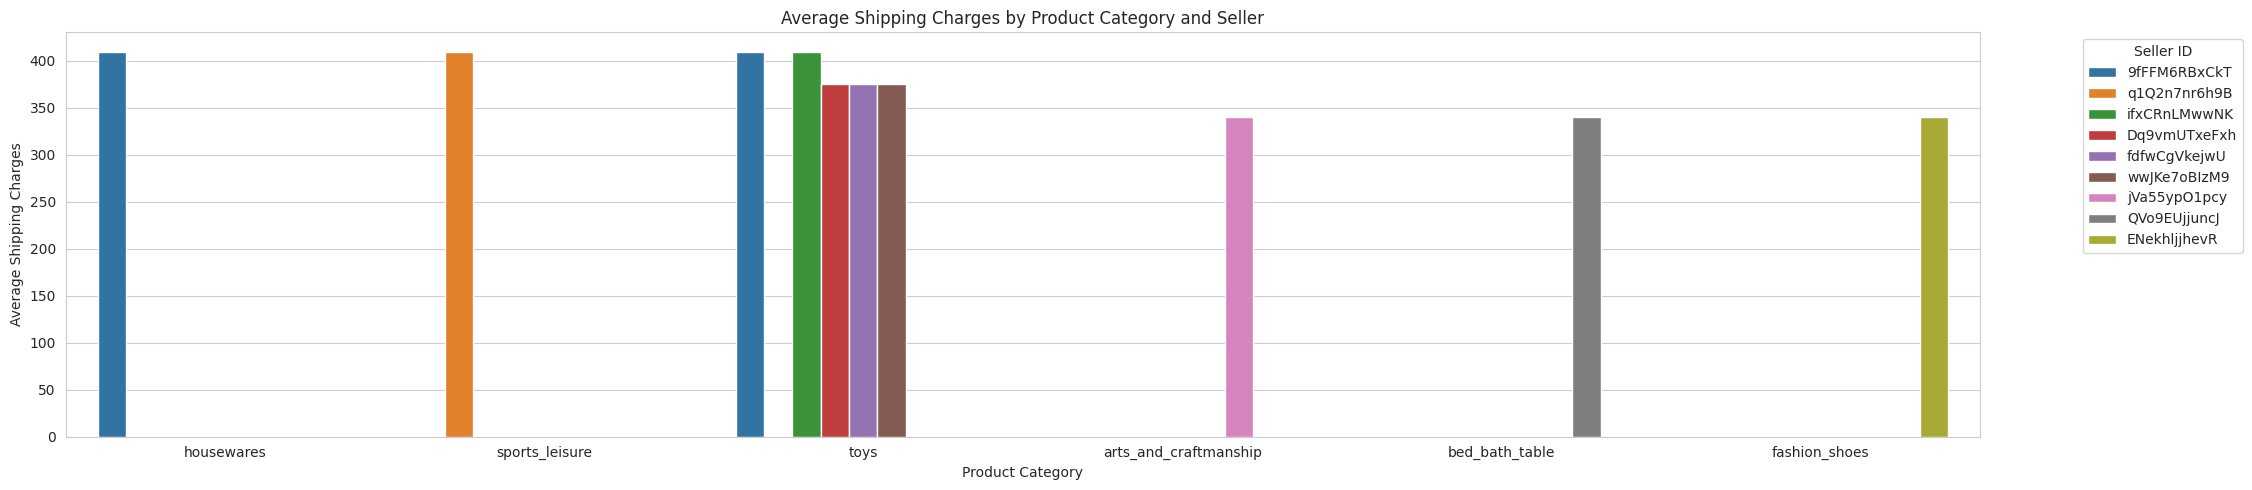

/tmp/ipython-input-36-833827064.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




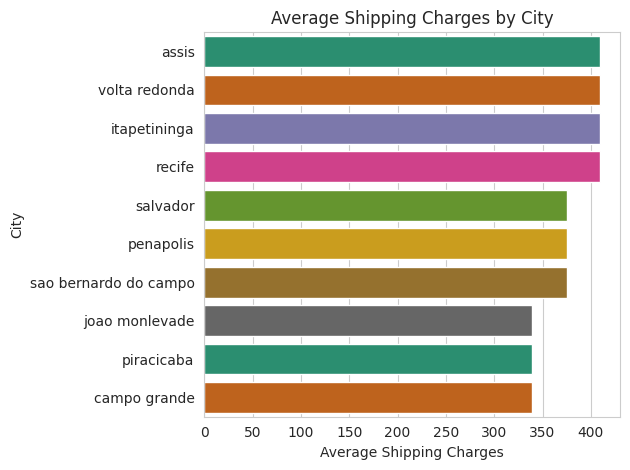

In [ ]:
# What are the average and total shipping charges by region, category, and seller?
query="SELECT SUM(shipping_charges) AS total_shipping_charges, AVG(shipping_charges) AS average_shipping_charges, product_category_name, seller_id,customer_city FROM payments_merged GROUP BY product_category_name, seller_id,customer_city ORDER BY average_shipping_charges DESC LIMIT 10;"
result=pysqldf(query)
plt.figure(figsize=(20,5))
sns.barplot(data=result, y='average_shipping_charges', x='product_category_name', hue="seller_id")
plt.title('Average Shipping Charges by Product Category and Seller')
plt.xlabel('Product Category')
plt.ylabel('Average Shipping Charges')
plt.tight_layout()
plt.legend(title='Seller ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
sns.barplot(data=result, x='average_shipping_charges', y='customer_city', palette="Dark2")
plt.title('Average Shipping Charges by City')
plt.xlabel('Average Shipping Charges')
plt.ylabel('City')
plt.tight_layout()
plt.show()


#####**Insights:**  Average Shipping Charges by City

Cities like Assis, Itapetininga, Volta Redonda, and Recife have the highest average shipping charges (close to 400).

Cities like João Monlevade and Piracicaba show relatively lower charges.

**Interpretation:**

Geographic distance or logistical complexity may be increasing costs in top cities.

Some cities with high charges might deter repeat purchases due to poor perceived value.

**Recommendations:**

Offer flat-rate or subsidized shipping in cities with high charges to encourage conversions.

Consider warehouse optimization or partnerships to serve those regions more affordably.

#####**Insights**:

Housewares, Sports & Leisure, and Toys tend to have the highest shipping charges (400+).

Some categories like Arts & Craftsmanship, Fashion Shoes, and Bed, Bath & Table have slightly lower rates.

**Interpretation:**

Product size or fragility might drive high shipping costs for these categories.

Seller performance varies within categories—some sellers consistently charge more for shipping.

**Recommendations:**

Train or guide sellers on packaging efficiency and optimized shipping methods.

Introduce free shipping thresholds or category-based promotions (e.g., "Free shipping on all toys").

####Are there orders with zero or unusually low shipping costs?

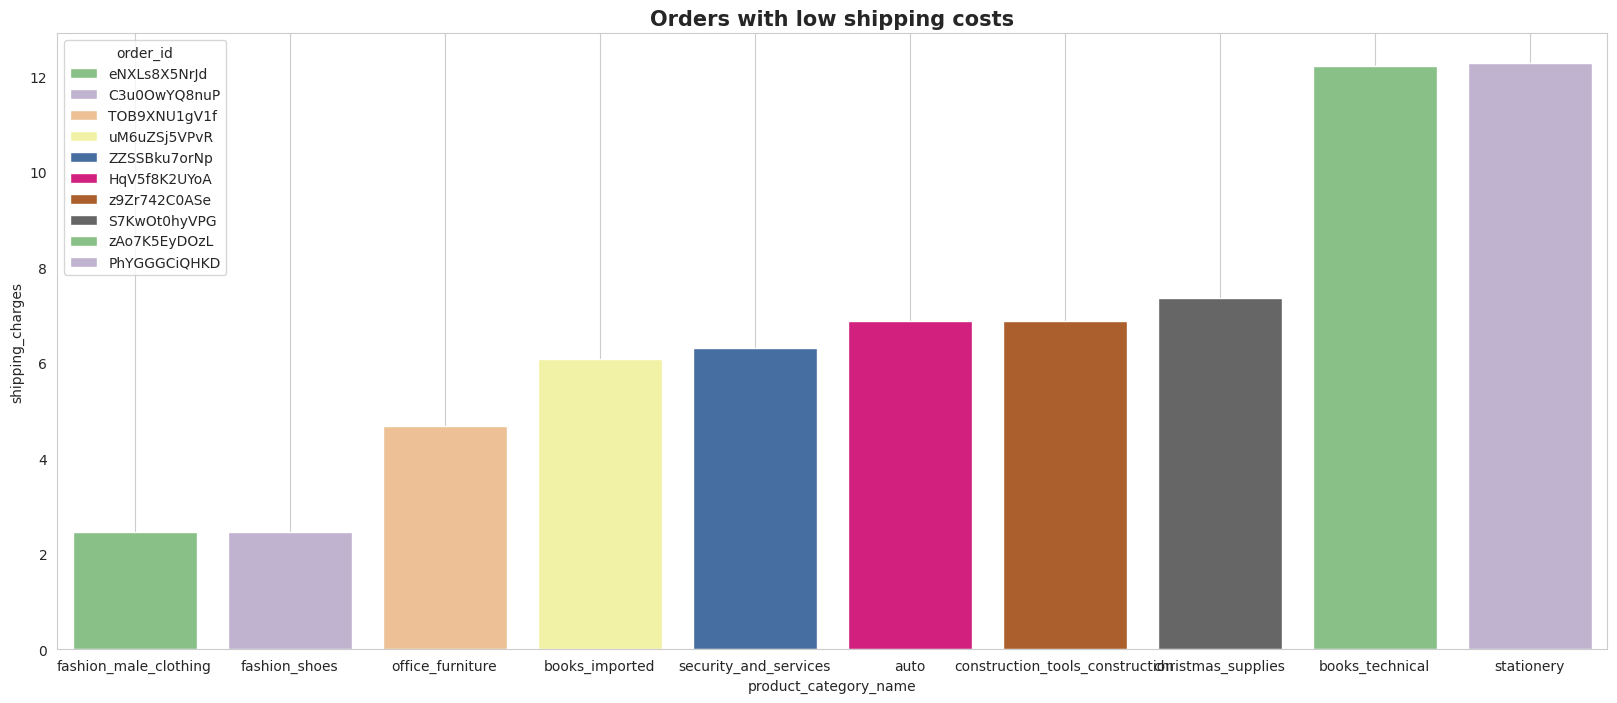

In [ ]:
#Are there orders with zero or unusually low shipping costs?
query="SELECT order_id, product_category_name, shipping_charges FROM payments_merged GROUP BY product_category_name ORDER BY shipping_charges ASC LIMIT 10;"
result= pysqldf(query)
result
#plt.figure(figsize=(20,8))
#sns.barplot(x="product_category_name", y="shipping_charges", data=result, hue="order_id", palette="Accent")
#plt.title("Orders with low shipping costs", fontsize=15, fontweight="bold")
#plt.grid()
#plt.show()

**Average Shipping Charges by Product Category and Seller**
#####**Insight:**
Toys, housewares, and sports_leisure show the highest average shipping charges, all above 400 units, with multiple sellers involved.
Meanwhile, categories like bed_bath_table and fashion_shoes have relatively lower shipping costs.

**Interpretation:**
High shipping costs are justified in toys due to their strong revenue impact, but housewares and sports_leisure appear costly without delivering high customer spend, which can hurt overall profitability.

Additionally, some sellers consistently charge more than others, suggesting shipping inefficiencies.

**Recommendation:**
For toys, consider offering free shipping thresholds or bundled discounts to absorb costs while maintaining strong sales.
For underperforming but costly categories like housewares, either optimize packaging and logistics or limit inventory. Work closely with efficient sellers to standardize shipping practices and reduce unnecessary cost.

###Summary & Recommendation
**Project Summary**

This project analyzes Shopify e-commerce orders from 2022–2023 to understand delivery times, identify delays, and examine customer buying patterns. Using SQL queries and Python visualizations, it highlights key bottlenecks and offers actionable recommendations to improve logistics and customer satisfaction.

**Summary**
- Most orders take about 11 days to arrive. Some places take much longer.

- About 8 out of 100 orders come late, especially during busy months like December.

- Paying by debit card helps get orders faster. Voucher payments take longer.

- Important things like diapers are delayed a lot, which is a problem.
- Top customers spend a lot but only buy once.

- Most big spenders are from São Paulo, some from other states too.

- Toys and furniture are the most popular and profitable products.

- Some customers wait a long time for delivery, which can upset them.

- Shipping costs are high in some cities and for certain product types like toys and housewares.

- Some sellers charge more for shipping than others.

**Recommendations**
- Fix delivery problems in places with big delays by opening local warehouses.

- To analyze diapers and important items get shipped faster.

- Get ready early for busy times so deliveries do not get late.

- Help customers pay by debit card to speed up delivery.
- Send follow-up messages after purchase to encourage buying again.

- Offer discounts or rewards for second and third orders.

- Focus marketing efforts on São Paulo and other states with good spending.

- Promote toys and furniture products more.

- Lower or fix shipping costs in cities where it’s very high.

- Help sellers use better packaging and cheaper shipping methods.

###**What** **I** **Learned**
Working on this end-to-end e-commerce order analysis project taught me a lot about real-world data problems and how to extract business value from raw data. Here are my key takeaways:

- Data Cleaning & Preparation:
I learned how to handle missing values, inconsistent data types, and duplicates in a structured way using Pandas. I also understood the importance of maintaining data integrity across merged datasets.

- Feature Engineering:
I created useful new metrics like average_delivery_time and order_satisfaction to answer real business questions and uncover hidden patterns.

- SQL within Python (pandasql):
I practiced combining SQL logic with Python to filter, group, and aggregate data, which helped me get more comfortable with query thinking inside Jupyter/Colab.

- Data Visualization:
I used Seaborn, Matplotlib, and Plotly to communicate findings visually. This helped me see how visual storytelling makes insights more powerful and understandable.

- Business Thinking:
More than just coding, I focused on why things matter — like late deliveries impacting customer trust or identifying loyal high-spenders for better retention.

- Project Structuring:
I learned how to present my work clearly with markdown, tables of contents, and structured analysis — making it easier for others to follow and understand my process.

Power BI Dashboard

While Python was used for all EDA and visualizations in this notebook, I also created a Power BI dashboard for business-friendly presentation.
👉 [View Dashboard (PDF)] [link text](https://drive.google.com/file/d/177BIJyH08bP58L9DeEASny952Pa255EU/view?usp=sharing)
